In [3]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import glob
import shutil
import os
from tensorflow import keras
from tensorflow.keras.models import Sequential
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import itertools

In [4]:
os.chdir(r'C:\Users\Arjo\Desktop\hello.ds\KERAS\dogs-vs-cats')
if os.path.isdir('train/dog') is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('valid/dog')
    os.makedirs('valid/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')

for c in random.sample(glob.glob('cat*'),500):
    shutil.move(c,'train/cat' )
for c in random.sample(glob.glob('dog*'),500):
    shutil.move(c,'train/dog' )
for c in random.sample(glob.glob('cat*'),100):
    shutil.move(c,'valid/cat' )
for c in random.sample(glob.glob('dog*'),100):
    shutil.move(c,'valid/dog' )
for c in random.sample(glob.glob('cat*'),50):
    shutil.move(c,'test/cat' ) 
for c in random.sample(glob.glob('dog*'),50):
    shutil.move(c,'test/dog' )          

os.chdir('../../')   

In [5]:
test_path=r'C:\Users\Arjo\Desktop\hello.ds\KERAS\dogs-vs-cats\test'
valid_path=r'C:\Users\Arjo\Desktop\hello.ds\KERAS\dogs-vs-cats\valid'
train_path=r'C:\Users\Arjo\Desktop\hello.ds\KERAS\dogs-vs-cats\train'

In [6]:
train_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat','dog'],batch_size=10)
valid_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat','dog'],batch_size=10)
test_batches=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat','dog'],batch_size=10,shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [7]:
vgg16=tf.keras.applications.vgg16.VGG16()

In [8]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
model=Sequential()
for layer in vgg16.layers[:-1]:
    model.add(layer)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [10]:
model.add(tf.keras.layers.Dense(units=2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [14]:
for layer in model.layers:
    layer.trainable=False

In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 441s - loss: 0.0975 - accuracy: 0.9660 - val_loss: 0.1125 - val_accuracy: 0.9750 - 441s/epoch - 4s/step
Epoch 2/10
100/100 - 353s - loss: 0.0975 - accuracy: 0.9660 - val_loss: 0.1125 - val_accuracy: 0.9750 - 353s/epoch - 4s/step
Epoch 3/10
100/100 - 391s - loss: 0.0975 - accuracy: 0.9660 - val_loss: 0.1125 - val_accuracy: 0.9750 - 391s/epoch - 4s/step
Epoch 4/10
100/100 - 352s - loss: 0.0975 - accuracy: 0.9660 - val_loss: 0.1125 - val_accuracy: 0.9750 - 352s/epoch - 4s/step
Epoch 5/10
100/100 - 329s - loss: 0.0975 - accuracy: 0.9660 - val_loss: 0.1125 - val_accuracy: 0.9750 - 329s/epoch - 3s/step
Epoch 6/10
100/100 - 352s - loss: 0.0975 - accuracy: 0.9660 - val_loss: 0.1125 - val_accuracy: 0.9750 - 352s/epoch - 4s/step
Epoch 7/10
100/100 - 443s - loss: 0.0975 - accuracy: 0.9660 - val_loss: 0.1125 - val_accuracy: 0.9750 - 443s/epoch - 4s/step
Epoch 8/10
100/100 - 517s - loss: 0.0975 - accuracy: 0.9660 - val_loss: 0.1125 - val_accuracy: 0.9750 - 517s/epoch - 5s/step


In [18]:
predictions=model.predict(x=test_batches, verbose=0)
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.

In [19]:
from sklearn.metrics import confusion_matrix


cm=confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions,axis=-1))

In [20]:
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without normalization")

    print(cm)

    thresh=cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    

Confusion matrix without normalization
[[46  4]
 [ 3 47]]


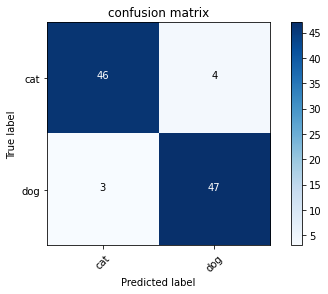

In [22]:
cm_plot_labels=['cat','dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='confusion matrix')

It is 93% accurate